In [416]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [417]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [418]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data2=test_data.copy()
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [419]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [420]:
test_data.drop(['Ticket'],axis=1,inplace=True)
train_data.drop(['Ticket'],axis=1,inplace=True)

In [421]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [422]:
g1 = train_data.groupby(['Sex','Pclass'])
g1['Age'].median()
g2 = test_data.groupby(['Sex','Pclass'])
g2['Age'].median()

Sex     Pclass
female  1         41.0
        2         24.0
        3         22.0
male    1         42.0
        2         28.0
        3         24.0
Name: Age, dtype: float64

In [423]:
train_data['Age'] = g1['Age'].apply(lambda x : x.fillna(x.median()))
test_data['Age'] = g2['Age'].apply(lambda x : x.fillna(x.median()))

In [424]:
train_data['Cabin'].fillna('N',inplace=True)
test_data['Cabin'].fillna('N',inplace=True)

In [425]:
frequent=train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(frequent,inplace=True)
frequent2=test_data['Embarked'].mode()[0]
test_data['Embarked'].fillna(frequent2,inplace=True)

In [426]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [427]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Cabin        418 non-null    object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [428]:
g3 = train_data.groupby(['Embarked'])
test_data['Fare'] = g3['Fare'].apply(lambda x : x.fillna(x.mode()))


Text(0.5, 1.0, 'Fare')

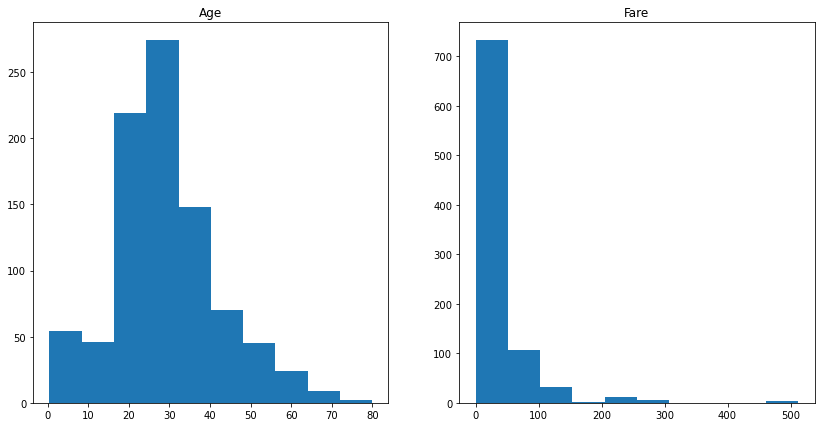

In [429]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.hist(train_data['Age'])
plt.title('Age')
plt.subplot(1,2,2)
plt.hist(train_data['Fare'])
plt.title('Fare')

Text(0.5, 1.0, 'Fare')

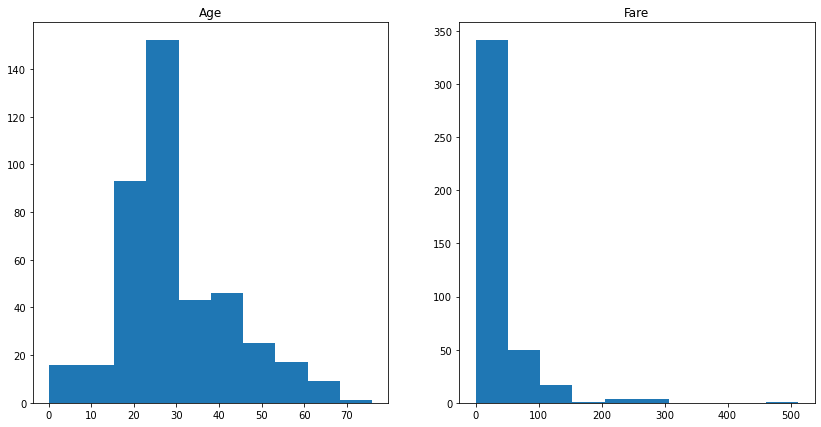

In [430]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.hist(test_data['Age'])
plt.title('Age')
plt.subplot(1,2,2)
plt.hist(test_data['Fare'])
plt.title('Fare')

Text(0.5, 1.0, 'Fare')

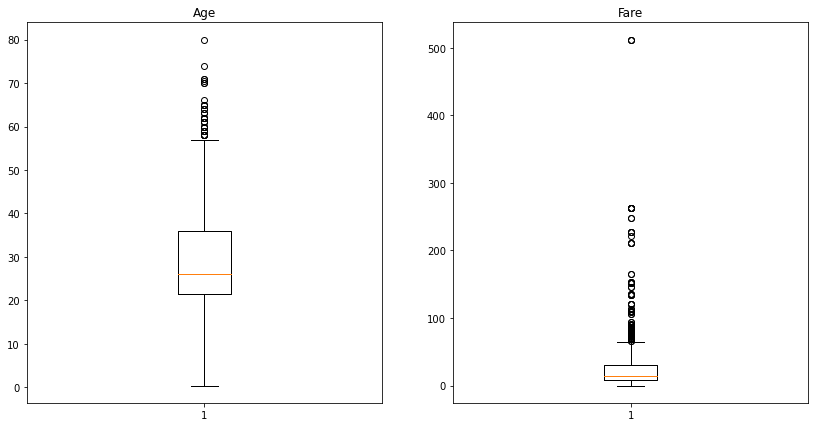

In [431]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.boxplot(train_data['Age'])
plt.title('Age')
plt.subplot(1,2,2)
plt.boxplot(train_data['Fare'])
plt.title('Fare')

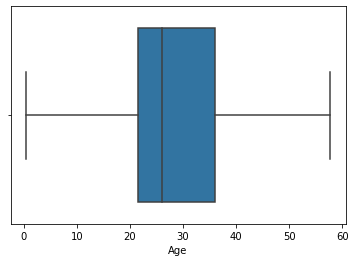

In [432]:
Q1=train_data['Age'].quantile(0.25)
Q3=train_data['Age'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
train_data['Age'] = np.where(train_data['Age']> Upper_Whisker,Upper_Whisker,train_data['Age'])
train_data['Age'] = np.where(train_data['Age']< Lower_Whisker,Lower_Whisker,train_data['Age'])
sns.boxplot(x=train_data["Age"])
plt.show()

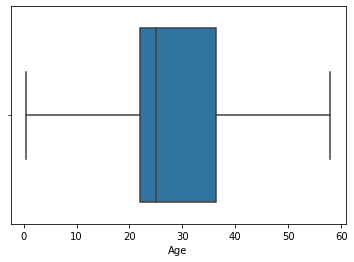

In [433]:
Q1=test_data['Age'].quantile(0.25)
Q3=test_data['Age'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
test_data['Age'] = np.where(test_data['Age']> Upper_Whisker,Upper_Whisker,test_data['Age'])
test_data['Age'] = np.where(test_data['Age']< Lower_Whisker,Lower_Whisker,test_data['Age'])
sns.boxplot(x=test_data["Age"])
plt.show()

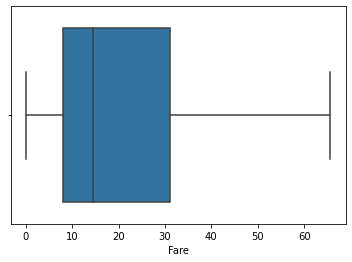

In [434]:
Q1=train_data['Fare'].quantile(0.25)
Q3=train_data['Fare'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
train_data['Fare'] = np.where(train_data['Fare']> Upper_Whisker,Upper_Whisker,train_data['Fare'])
train_data['Fare'] = np.where(train_data['Fare']< Lower_Whisker,Lower_Whisker,train_data['Fare'])
sns.boxplot(x=train_data["Fare"])
plt.show()

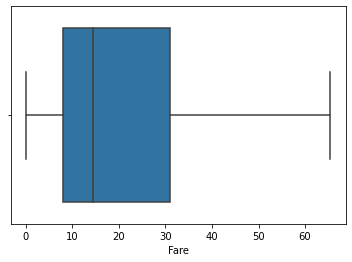

In [435]:
Q1=test_data['Fare'].quantile(0.25)
Q3=test_data['Fare'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
test_data['Fare'] = np.where(test_data['Fare']> Upper_Whisker,Upper_Whisker,test_data['Fare'])
test_data['Fare'] = np.where(test_data['Fare']< Lower_Whisker,Lower_Whisker,test_data['Fare'])
sns.boxplot(x=test_data["Fare"])
plt.show()

In [436]:
print(train_data['Cabin'].unique())
print(train_data['Embarked'].unique())
print(train_data['Pclass'].unique())

['N' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
['S' 'C' 'Q']
[3 1 2]


In [437]:
train_data.drop(['Cabin'],axis=1,inplace=True)
test_data.drop(['Cabin'],axis=1,inplace=True)

In [438]:
train_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [439]:
train_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [440]:
changes={'Embarked':{'C':1,'Q':2,'S':3},
        'Parch':{'0':2,'1':1,'2':1,'3':1,'4':4,'5':3,'6':4}}

In [441]:
train_data = train_data.replace(changes)
test_data=test_data.replace(changes)

In [442]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [443]:
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by="Survived",ascending=False)


,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [444]:
test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
    



In [445]:
changes={'Title':{'Mrs':1,'Miss':1,'Master':2,'Rare':3,'Mr':4}}
train_data=train_data.replace(changes)
test_data=test_data.replace(changes)

In [446]:
train_data[["Sex","Pclass","Survived"]].groupby(["Sex","Pclass"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


In [447]:
train_data.loc[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 1), 'New'] = 1  
train_data.loc[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 2), 'New'] = 1 
train_data.loc[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 3), 'New'] = 2
train_data.loc[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 1), 'New'] = 3
train_data.loc[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 2), 'New'] = 4
train_data.loc[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 3), 'New'] = 4

In [448]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,New
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,3,4,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,65.6344,1,1,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,3,1,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,3,1,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,3,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,3,3,4.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,3,1,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,23.4500,3,1,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,1,4,3.0


In [449]:
test_data.loc[(test_data['Sex'] == 'female') & (test_data['Pclass'] == 1), 'New'] = 1  
test_data.loc[(test_data['Sex'] == 'female') & (test_data['Pclass'] == 2), 'New'] = 1 
test_data.loc[(test_data['Sex'] == 'female') & (test_data['Pclass'] == 3), 'New'] = 2
test_data.loc[(test_data['Sex'] == 'male') & (test_data['Pclass'] == 1), 'New'] = 3
test_data.loc[(test_data['Sex'] == 'male') & (test_data['Pclass'] == 2), 'New'] = 4
test_data.loc[(test_data['Sex'] == 'male') & (test_data['Pclass'] == 3), 'New'] = 4

In [450]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
enc_df = pd.DataFrame(onehotencoder.fit_transform(train_data[['Sex']]).toarray())
train_data = train_data.join(enc_df)
enc_df2 = pd.DataFrame(onehotencoder.fit_transform(test_data[['Sex']]).toarray())
test_data = test_data.join(enc_df2)

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,New,0,1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,3,4,4.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,65.6344,1,1,1.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,3,1,2.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,3,1,1.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,3,4,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,3,3,4.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,3,1,1.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,23.4500,3,1,2.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,1,4,3.0,0.0,1.0


In [451]:
train_data.rename(columns={0:"Male"},inplace=True)

test_data.rename(columns={0:"Male"},inplace=True)



In [452]:
train_data.drop(['Sex',1],inplace=True,axis=1)
test_data.drop(['Sex',1],inplace=True,axis=1)


In [453]:
train_data['Members']=train_data['SibSp']+train_data['Parch']
train_data.drop(['SibSp','Parch'],axis=1,inplace=True)
test_data['Members']=test_data['SibSp']+test_data['Parch']
test_data.drop(['SibSp','Parch'],axis=1,inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Age,Fare,Embarked,Title,New,Male,Members
0,1,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,3,4,4.0,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,65.6344,1,1,1.0,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,3,1,2.0,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,3,1,1.0,1.0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,8.0500,3,4,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,13.0000,3,3,4.0,0.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,30.0000,3,1,1.0,1.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21.5,23.4500,3,1,2.0,1.0,3
889,890,1,1,"Behr, Mr. Karl Howell",26.0,30.0000,1,4,3.0,0.0,0


In [454]:
train_data[["Members", "Survived"]].groupby(['Members'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Members,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [455]:
changes={'Members':{'3':1,'1':2,'2':2,'6':3,'0':3,'4':4,'5':5,'7':6,'8':6}}

In [456]:
train_data=train_data.replace(changes)
test_data=test_data.replace(changes)

<AxesSubplot:>

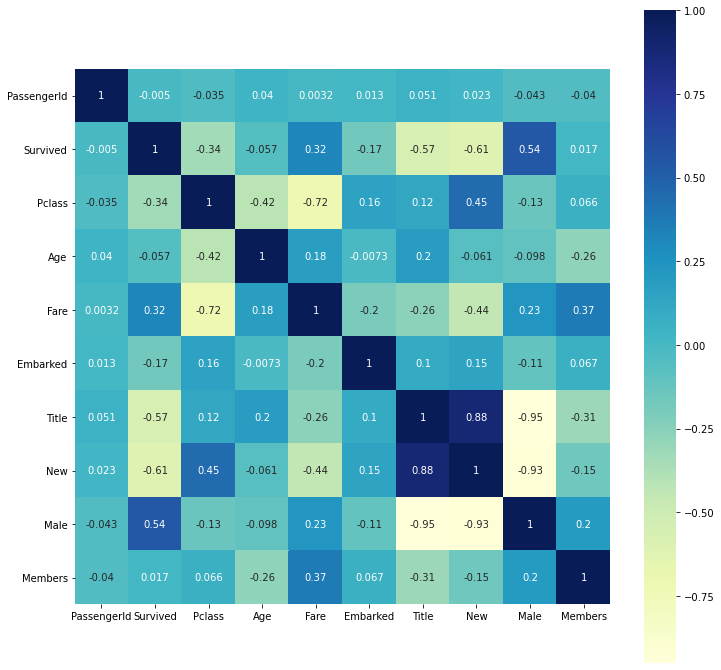

In [457]:
correlation=train_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation,annot=True,square=True,cmap="YlGnBu")


In [458]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_data['Age'] = scaler.fit_transform(train_data[['Age']])
train_data['Fare']=scaler.fit_transform(train_data[['Fare']])
test_data['Age'] = scaler.fit_transform(test_data[['Age']])
test_data['Fare']=scaler.fit_transform(test_data[['Fare']])

In [459]:
train_data.drop(['PassengerId','Name','Age'],axis=1,inplace=True)
test_data.drop(['PassengerId','Name','Age'],axis=1,inplace=True)

In [460]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [461]:
y = train_data['Survived']
train_data.drop(['Survived'],axis=1,inplace=True)
x = train_data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [462]:
x

,Pclass,Fare,Embarked,Title,New,Male,Members
0,3,-0.820552,3,4,4.0,0.0,1
1,1,2.031623,1,1,1.0,1.0,1
2,3,-0.787578,3,1,2.0,1.0,0
3,1,1.419297,3,1,1.0,1.0,1
4,3,-0.781471,3,4,4.0,0.0,0
...,...,...,...,...,...,...,...
886,2,-0.539655,3,3,4.0,0.0,0
887,1,0.290823,3,1,1.0,1.0,0
888,3,-0.029155,3,1,2.0,1.0,3
889,1,0.290823,1,4,3.0,0.0,0


In [463]:
models = {}
result = {}
models['LOR']=LogisticRegression(solver = 'liblinear',C=0.4)
models['KNN']=KNeighborsClassifier(n_neighbors=10)
models['RFC']=RandomForestClassifier(n_estimators=50)
models['SVC']=SVC()
models['CART']=DecisionTreeClassifier()

In [464]:
for key in models:
    kfold = StratifiedKFold(n_splits=5,shuffle=True)
    cv_results = cross_val_score(models[key], x_train, y_train, cv=kfold, scoring='accuracy')
    result[key]=cv_results.mean()

In [465]:
result

{'LOR': 0.8052329192546583,
 'KNN': 0.8126863354037267,
 'RFC': 0.8139906832298136,
 'SVC': 0.8352096273291926,
 'CART': 0.8164673913043478}

In [466]:
chosen_one = max(result,key=result.get)

In [467]:
model=models[chosen_one].fit(x_train,y_train)
predictions = model.predict(x_test)

In [468]:
print(model.score(x_test,y_test))

0.8


In [469]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Fare      418 non-null    float64
 2   Embarked  418 non-null    int64  
 3   Title     418 non-null    int64  
 4   New       418 non-null    float64
 5   Male      418 non-null    float64
 6   Members   418 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 23.0 KB


In [470]:
predictions2=model.predict(test_data)

In [471]:

output = pd.DataFrame({'PassengerId': test_data2.PassengerId, 'Survived': predictions2})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
